### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_5046/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

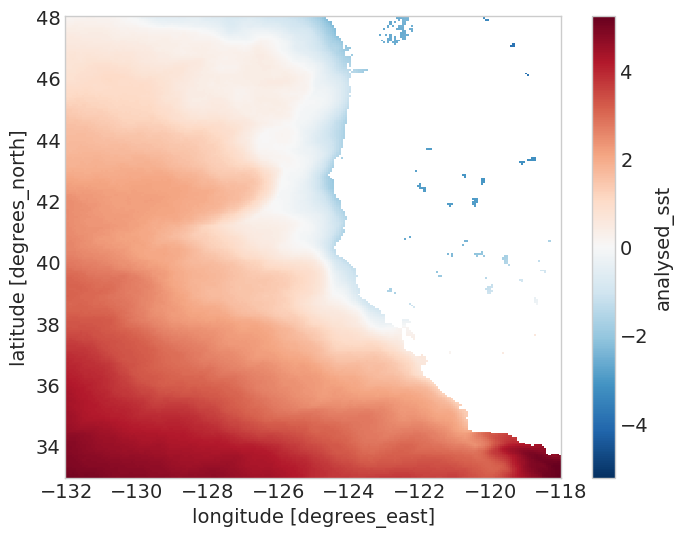

In [4]:
# wrong
# find sst mean from 2002 - 2012
# anomoly = sst value on that day - sst mean from 2002 - 2012
# to find max anamoly month - find average anomoly per month per year and find the maximum
## anomoly per month by comparing by month across years (all the january's compared, etc.) 

sst_mean = ds.sel(time=slice('2002', '2012')).analysed_sst.mean().data.tolist()
anomolies = ds.analysed_sst - sst_mean
grouped = anomolies.groupby(ds.time.dt.year).mean()
m = grouped.max(dim='year')
m.plot()

In [5]:
mean = ds.sel(time=slice('2002', '2012')).groupby('time.dayofyear').mean()
mean

<xarray.Dataset>
Dimensions:           (dayofyear: 366, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * dayofyear         (dayofyear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    analysed_sst      (dayofyear, lat, lon) float32 290.1 290.0 ... nan nan
    analysis_error    (dayofyear, lat, lon) float32 0.381 0.382 ... nan nan
    mask              (dayofyear, lat, lon) float32 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (dayofyear, lat, lon) float32 nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [6]:
max_per_day = ds.groupby('time.dayofyear').max()
max_per_day

<xarray.Dataset>
Dimensions:           (dayofyear: 366, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * dayofyear         (dayofyear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    analysed_sst      (dayofyear, lat, lon) float32 291.3 291.3 ... nan nan
    analysis_error    (dayofyear, lat, lon) float32 0.4 0.4 0.4 ... nan nan nan
    mask              (dayofyear, lat, lon) float32 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (dayofyear, lat, lon) float32 nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

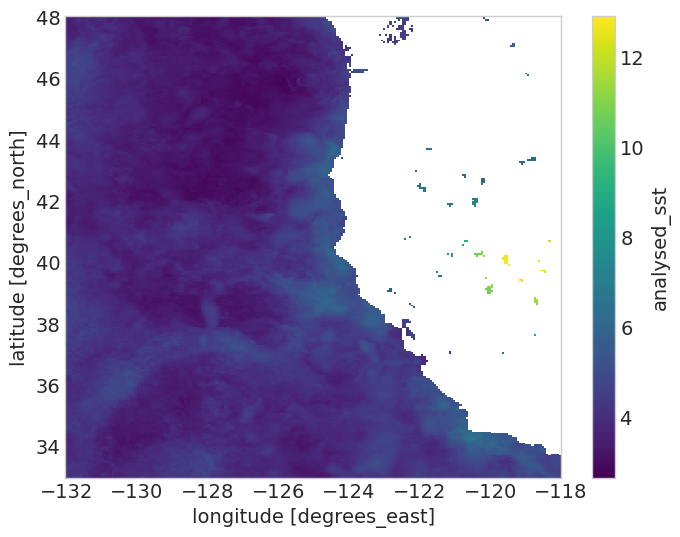

In [8]:
max_anomoly = max_per_day - mean
hi = max_anomoly.max(dim='dayofyear').analysed_sst.plot()

In [9]:
max_anomoly

<xarray.Dataset>
Dimensions:           (lat: 251, lon: 234, dayofyear: 366)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * dayofyear         (dayofyear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    analysed_sst      (dayofyear, lat, lon) float32 1.286 1.294 ... nan nan
    analysis_error    (dayofyear, lat, lon) float32 0.019 0.018 ... nan nan
    mask              (dayofyear, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    sea_ice_fraction  (dayofyear, lat, lon) float32 nan nan nan ... nan nan nan

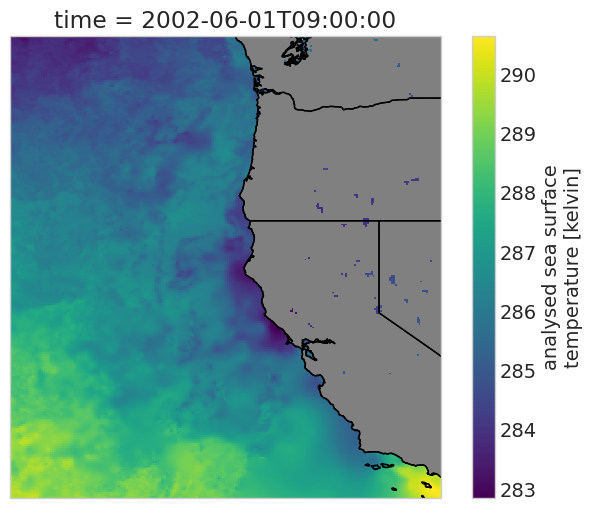

In [10]:
# From hw03-climate.ipynb - use part of this to make graph look like a map
ds.analysed_sst[0, :, :].plot()

# Plot on a map
ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))